In [16]:
from fastai.vision  import *

## Collecting Data

Gave folder names, file name which i have downloaded from the google
steps:-
1. search for image, scroll down to some images(so that its url of images can be loaded)
2. use CTRL+SHIFT+J and open developer consol window there pasted this  - 
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

3. It will download a txt file consisting all urls of images name the file and work is done

In [9]:
folders = ['Shaktiman', 'Chulbul_pandey', 'Krrish', 'Hanuman', 'flying_jatt', 'Rajinikanth']
files = ['Shakti_man', 'Chulbulpandey', 'Krish', 'Hanu_man', 'flyingjatt', 'Rajini_kanth']

#### Here I have downloaded the images using files that i have downloaded before to create a dataset for our classifier

In [39]:
path = Path('/home/mr/my_fold/projects/Indian Avenger Classification/Dataset')
for i, name in enumerate(folders):
    dest = path/name
    dest.mkdir(parents = True, exist_ok = True)
    download_images(path/files[i], dest, max_pics = 200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [41]:
classes = folders

#### verify_images will verify all the images present in the folder and will delete any corrupted image

In [42]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True)

Shaktiman


Chulbul_pandey


Krrish


Hanuman


flying_jatt


Rajinikanth


## Classification

1. Used np.random.seed so that everytime it will take same set of data for validation set
2. Converted data into image databunch object it contains test data, train data, validation data, labels and different data bunched together as we are using image it will be image databunch
3. Mentioned path of the folder, put train = data as in current folder, made a validation set of 20% of the dataset, size of image will be 224 batch size is 64
4. Normmalized the data

In [48]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2,
                                  size = 256, bs = 64).normalize(imagenet_stats)

In [49]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Chulbul_pandey',
  'Hanuman',
  'Krrish',
  'Rajinikanth',
  'Shaktiman',
  'flying_jatt'],
 6,
 636,
 159)

### Exploring dataset

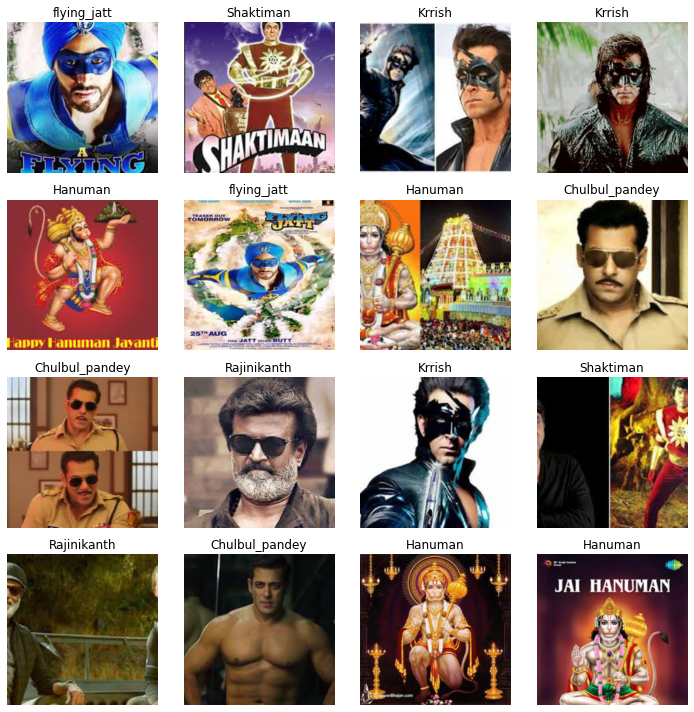

In [51]:
data.show_batch(rows = 4, figsize = (10,10))

### Using Cnn architecture and resnet 18 an my model 

In [69]:
avenger = cnn_learner(data, models.resnet18, metrics = error_rate)
avenger.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,2.304595,1.227505,0.459119,00:06
1,1.323221,0.546040,0.144654,00:06
2,0.876133,0.514229,0.119497,00:06
3,0.621574,0.526049,0.132075,00:06
4,0.471657,0.498629,0.132075,00:06
5,0.365928,0.491291,0.132075,00:06
6,0.293191,0.488179,0.132075,00:06


### As from the above we can say that validation loss is not changing it has become stable and train loss is decreasing this should be stopped here only 

### saving model and finding good learning rate for our model

In [71]:
avenger.save('model-0')
avenger.unfreeze()
avenger.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


### plotting learning rate to get better view of which learning rate to choose. Choosing the rate which is going down faster and with less fluctuation in between

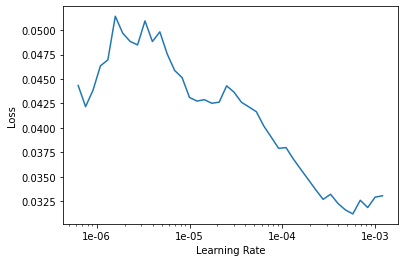

In [72]:
avenger.recorder.plot()

### Again training for 3 cycles with the chosen learning rate

In [73]:
avenger.fit_one_cycle(3, max_lr = slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.033803,0.524410,0.138365,00:08
1,0.027096,0.560519,0.138365,00:08
2,0.026202,0.540093,0.132075,00:08


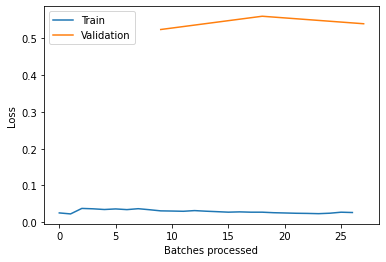

In [74]:
avenger.recorder.plot_losses()

In [75]:
avenger.save('model-1')

### Drawing a confusion matrix to get to know about the loss and errors

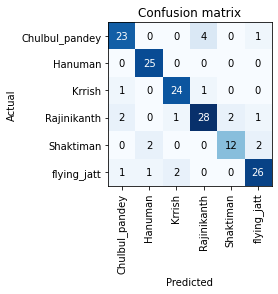

In [76]:
avenger.load('model-1')
interp = ClassificationInterpretation.from_learner(avenger)
interp.plot_confusion_matrix()

### These are the top losses 20 losses in our data and that is mainly because of choosing wrong dataset

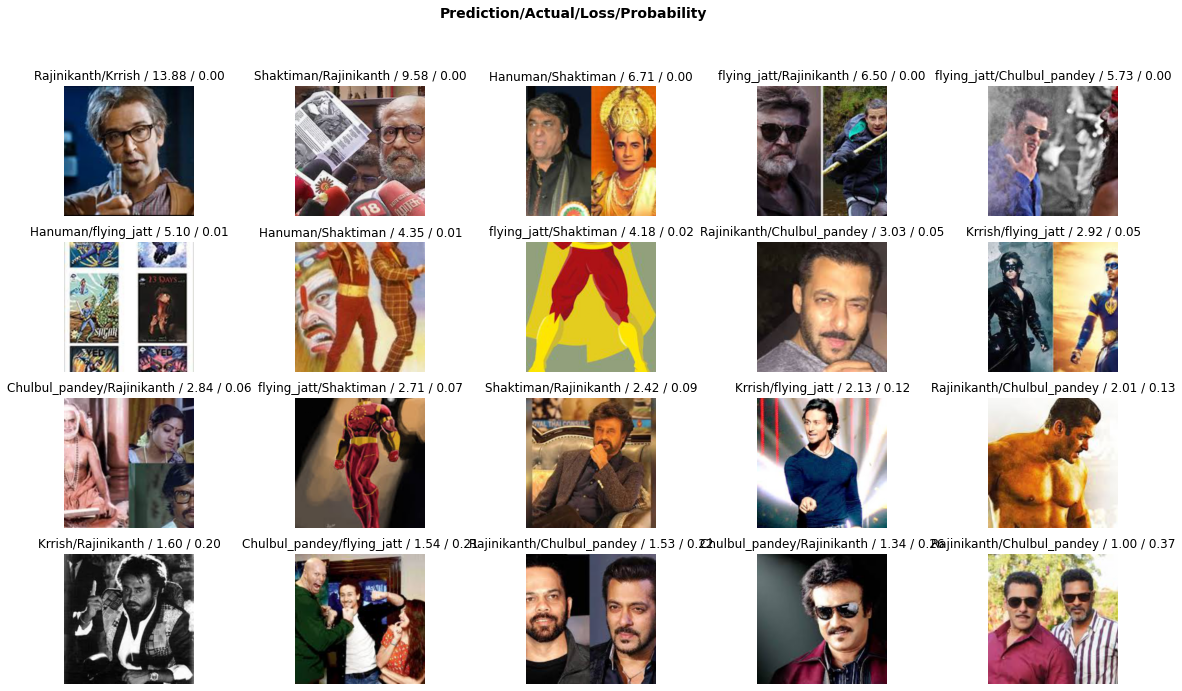

In [79]:
interp.plot_top_losses(20, figsize = (20,11))